<a href="https://colab.research.google.com/github/PaletteofDesign/abalone_linear_regression/blob/main/abalone_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [31]:
f = '/content/abalone.data'
df = pd.read_csv(f, sep=',',header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [32]:
df.rename(columns={0:'Sex', 1:'Lenght', 2:'Diameter', 3:'Height', 4:'Whole', 5:'Shucked_Weight',
          6:'Viscera_Weight', 7:'Shell_Weight', 8:'Rings'}, inplace=True)
df.head()

,Sex,Lenght,Diameter,Height,Whole,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [33]:
df['Age'] = df['Rings']+1.5

In [34]:
df.head()

,Sex,Lenght,Diameter,Height,Whole,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [35]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [36]:
df.head()

,Lenght,Diameter,Height,Whole,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings,Age,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,1,0


In [38]:
df.isna().sum()

Lenght            0
Diameter          0
Height            0
Whole             0
Shucked_Weight    0
Viscera_Weight    0
Shell_Weight      0
Rings             0
Age               0
Sex_I             0
Sex_M             0
dtype: int64

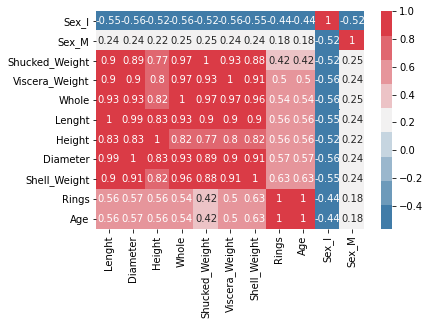

In [41]:
sn.heatmap(df.corr().sort_values(by=['Age']),cmap=sn.diverging_palette(240,10,n=9), annot=True)

In [60]:
X = df.loc[:,['Viscera_Weight', 'Whole', 'Lenght', 'Height', 'Diameter', 'Shell_Weight', 'Rings']].values
y = df.loc[:,['Age']].values

In [61]:
X

array([[ 0.101 ,  0.514 ,  0.455 , ...,  0.365 ,  0.15  , 15.    ],
       [ 0.0485,  0.2255,  0.35  , ...,  0.265 ,  0.07  ,  7.    ],
       [ 0.1415,  0.677 ,  0.53  , ...,  0.42  ,  0.21  ,  9.    ],
       ...,
       [ 0.2875,  1.176 ,  0.6   , ...,  0.475 ,  0.308 ,  9.    ],
       [ 0.261 ,  1.0945,  0.625 , ...,  0.485 ,  0.296 , 10.    ],
       [ 0.3765,  1.9485,  0.71  , ...,  0.555 ,  0.495 , 12.    ]])

In [62]:
y

array([[16.5],
       [ 8.5],
       [10.5],
       ...,
       [10.5],
       [11.5],
       [13.5]])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [64]:
reg = LinearRegression(fit_intercept=True)

In [68]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
train_preds = reg.predict(X_train)

In [70]:
test_preds = reg.predict(X_test)

In [76]:
train_preds

array([[10.5],
       [13.5],
       [11.5],
       ...,
       [12.5],
       [10.5],
       [ 7.5]])

In [74]:
test_preds

array([[10.5],
       [ 9.5],
       [17.5],
       ...,
       [ 9.5],
       [10.5],
       [11.5]])

In [77]:
train_score = reg.score(X_train, y_train)
print(train_score)

1.0


In [79]:
test_score = reg.score(X_test, y_test)
print(test_score)

1.0
